In [1]:
import json
import re
import polars as pl 
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
def remove_punkt(text):
  """
  Remove everything except commas from the text.
  """
  punkt = (string.punctuation + '’').replace(',', '')
  return text.translate(str.maketrans('', '', punkt))

def find_experience_years(requirements: list) -> int: 
  regex = re.compile(r'(?P<years>\d+) years?')
  results = [] 
  for req in requirements:
    match = regex.search(req)
    if match:
      results.append(int(match.group('years')))
  return int(sum(results) / len(results)) if results else 0  

data = pl.read_json('../data/google_vacancies.json')
data = data.with_columns(data['requirements'].map_elements(lambda x: len(x), return_dtype=pl.Int32).alias('n_requirements')) 
data = data.with_columns(data['title'].alias('full_title'))
data = data.with_columns(data['title'].map_elements(lambda x: x.split(',')[0], return_dtype=pl.Utf8).alias('title'))
data = data.with_columns(data['country'].map_elements(str.strip, return_dtype=pl.Utf8))
data = data.with_columns(data['requirements'].map_elements(lambda x: list(map(remove_punkt, x)), return_dtype=pl.List(pl.Utf8)))
data = data.with_columns(data['requirements'].map_elements(lambda x: find_experience_years(x), return_dtype=pl.Int32).alias('experience_years'))

data = data['title', 'full_title', 'requirements', 'n_requirements', 'level', 'experience_years', 'place', 'country']
data

title,full_title,requirements,n_requirements,level,experience_years,place,country
str,str,list[str],i32,str,i32,str,str
"""Project Management Apprentices…","""Project Management Apprentices…","[""Currently attending high school, completed high school, or enrolled until the second semester in Technology or Bachelors degree courses"", ""Less than 1 year of project management experience""]",2,"""INTERN_AND_APPRENTICE""",1,"""São Paulo, State of São Paulo,…","""Brazil"""
"""Associate Software Developer I…","""Associate Software Developer I…","[""Currently pursuing a Bachelors degree in Computer Science or related technical field of study"", ""Experience programming in either Java, C, or Python""]",2,"""INTERN_AND_APPRENTICE""",0,"""Sydney NSW, Australia""","""Australia"""
"""Software Engineering Intern""","""Software Engineering Intern, 2…","[""Due to local compliance requirements, applicants must be currently pursuing a Bachelors degree in Computer Science or related technical field at a university in Mexico City with an expected graduation date in December 2025"", ""Experience writing code fixes and programming in one or more of the following languages C, C, Java, JavaScript, Python, or Golang Go""]",2,"""INTERN_AND_APPRENTICE""",0,"""Mexico City, CDMX, Mexico""","""Mexico"""
"""Sourcing Specialist""","""Sourcing Specialist, gReach Pr…","[""Bachelors degree or equivalent practical experience"", ""1 year experience in recruiting or related HR field"", ""Ability to communicate in English and Japanese fluently in order to interact with internal and external stakeholders""]",3,"""INTERN_AND_APPRENTICE""",1,"""Tokyo, Japan""","""Japan"""
"""Student Researcher""","""Student Researcher, PhD, Winte…","[""Currently enrolled in a PhD degree in Computer Science, Linguistics, Statistics, Biostatistics, Applied Mathematics, Operations Research, Economics, Natural Sciences, or related technical field"", ""Experience in one area of computer science eg, Natural Language Understanding, Human Computer Interactions, Computer Vision, Machine Learning, Deep Learning, Algorithmic Foundations of Optimization, Quantum Information Science, Data Science, Software Engineering, or similar areas""]",2,"""INTERN_AND_APPRENTICE""",0,"""Mountain View, CA, USA""","""USA"""
…,…,…,…,…,…,…,…
"""Distinguished Engineer""","""Distinguished Engineer, Obliga…","[""Bachelors degree in Computer Science, similar technical field of study, or equivalent practical experience"", ""15 years of professional experience in software engineering"", ""15 years of experience leading in a technical capacity or leading technical risk analysis in an enterprise environment""]",3,"""DIRECTOR_PLUS""",15,"""Sunnyvale, CA, USA""","""USA"""
"""Distinguished Engineer""","""Distinguished Engineer, Demand…","[""Bachelors Degree in Computer Science, a related field, or equivalent practical experience"", ""15 years of software engineering experience building and working with systems in a technology organization"", ""10 years of experience in applying forecasting, optimization, and supply chain management to solve problems""]",3,"""DIRECTOR_PLUS""",12,"""Seattle, WA, USA""","""USA"""
"""Director""","""Director, Technical Program Ma…","[""Bachelors degree in ITComputer Science or equivalent practical experience"", ""15 years of experience running and delivering results on projects across regions and teams"", ""10 years of experience in program management, with a focus on technology operations""]",3,"""DIRECTOR_PLUS""",12,"""Sunnyvale, CA, USA""","""USA"""


In [3]:
data.group_by('country').agg(pl.len().alias('count')).sort('count', descending=True)

country,count
str,u32
"""USA""",3600
"""India""",1120
"""Ireland""",400
"""Japan""",400
"""Mexico""",320
…,…
"""Brazil""",80
"""Malaysia""",80
"""South Korea""",80


In [4]:
data.explode(pl.col('requirements')).group_by('requirements').agg(pl.len().alias('count')).sort('count', descending=True).head(20)

requirements,count
str,u32
"""Bachelors degree or equivalent…",2880
"""Experience in one area of comp…",480
"""1 year of experience with soft…",400
"""5 years of experience testing,…",240
"""Bachelors degree in Computer S…",240
…,…
"""2 years of experience with sof…",160
"""Experience in technical leader…",160
"""Bachelors degree in ITComputer…",160


<Axes: ylabel='Count'>

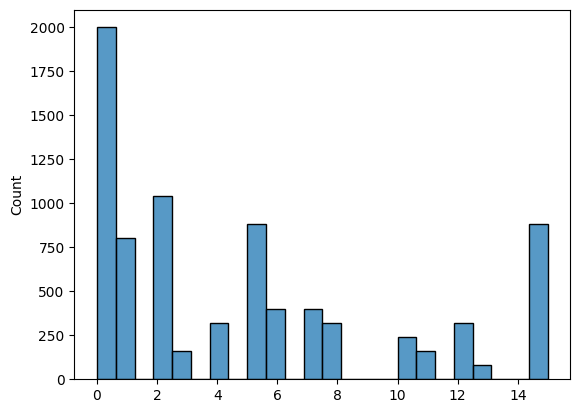

In [5]:
sns.histplot(data['experience_years']) 

In [8]:
country_counts = (
    data.group_by('country')
        .agg(pl.len().alias('count'))
        .sort('count', descending=True)
        .to_dicts()
)

with open('../data/country_pie.json', 'w') as f:
    json.dump(country_counts, f, ensure_ascii=False, indent=2)
country_counts

[{'country': 'USA', 'count': 3600},
 {'country': 'India', 'count': 1120},
 {'country': 'Japan', 'count': 400},
 {'country': 'Ireland', 'count': 400},
 {'country': 'Mexico', 'count': 320},
 {'country': 'Taiwan', 'count': 240},
 {'country': 'Poland', 'count': 240},
 {'country': 'Canada', 'count': 240},
 {'country': 'Australia', 'count': 240},
 {'country': 'Israel', 'count': 160},
 {'country': 'Switzerland', 'count': 160},
 {'country': 'UK', 'count': 160},
 {'country': 'Germany', 'count': 160},
 {'country': 'South Korea', 'count': 80},
 {'country': 'Netherlands', 'count': 80},
 {'country': 'Singapore', 'count': 80},
 {'country': 'Romania', 'count': 80},
 {'country': 'Brazil', 'count': 80},
 {'country': 'Malaysia', 'count': 80},
 {'country': 'Argentina', 'count': 80}]

In [16]:
import numpy as np

table_data = []
for level in data['level'].unique():
    df_level = data.filter(pl.col('level') == level)
    reqs = df_level.explode('requirements')['requirements']
    if len(reqs) > 0:
        most_freq_req = reqs.value_counts().sort('count', descending=True)['requirements'][0]
    else:
        most_freq_req = ""
    med_exp = int(np.median(df_level['experience_years']))
    med_nreq = int(np.median(df_level['n_requirements']))
    table_data.append({
        "level": level.capitalize().replace('_', ' '),
        "most_frequent_requirement": most_freq_req,
        "median_experience_years": med_exp,
        "median_n_requirements": med_nreq
    })
    table_data = sorted(table_data, key=lambda x: x['median_experience_years'], reverse=True)

with open('../data/level_table.json', 'w') as f:
    json.dump(table_data, f, ensure_ascii=False, indent=2)

In [7]:
data.write_json('../data/requirements_dashboard.json')